# Popular Data Science Questions

## Introduction

We're working for a company that creats data science content of various types: books, articles, videos, etc. and are tasked with finding the best topics for future content. As our the intent of our content is generally to help others learn, we should discover the topic or topics that people are most interested in learning.

One of the most popular sites for learning about programming is [Stack Overflow](https://stackoverflow.com/), a question-and-answer community where people are encouraged to ask questions, learn, and share technical knowledge. Stack Overflow is part of a network of sites called [Stack Exchange](https://stackexchange.com/).

## Stack Exchange

[Stack Exchange](https://en.wikipedia.org/wiki/Stack_Exchange) has 180 communities on many diverse topics: technical fields such as programming and mathematics, language learning, a variety of religious sites, music, arts, and even recreational activities such as travel, the outdoors, and golf.

There are many different sites we could use for our research, but given that we are a data science company, the [Data Science community](https://datascience.stackexchange.com/) is most relevant. Additionally, the data science site has one of the lowest percentages of answered questions in the Stack Exchange network, demonstrating that there is a need for more data science content.

## Stack Exchange Data Explorer

In order to make a proper analysis, we need to access the data from the site in bulk. While we could scrape the site, an easier alternative is [Stack Exchange Data Explorer](https://data.stackexchange.com/)(SEDE). SEDE contains a public database for each of Stack Exhange's websites, allowing us to [write a query](https://data.stackexchange.com/datascience/query/new) specifically for the data science site] and pull only the information that we need.

## Getting the Data

We are looking for the best topics for future content, so the easiest and likely best method is to look at the questions that people are currently asking. If we look at the `posts` table, there are a number of columns that seem relevant to our analysis:

* `Id`: An identification number for the post.
* `PostTypeId`: An identification number for the type of post.
* `CreationDate`: The date and time of creation of the post.
* `Score`: The post's score.
* `ViewCount`: How many times the post was viewed.
* `Tags`: What tags were used.
* `AnswerCount`: How many answers the question got (only applicable to question posts).
* `FavoriteCount`: How many times the question was favored (only applicable to question posts).

While there are eight different types of posts, the overwhelming majority of posts are questions or answers. Since we're interested in what people want to learn, we'll focus only on the questions, and we'll limit our analysis to the posts of 2019, since there may be trends in different areas, and we want to know what people are currently searching.

```mysql
SELECT Id, PostTypeId, CreationDate, Score,
      ViewCount, Tags, AnswerCount, FavoriteCount
FROM posts
WHERE PostTypeId=1 and YEAR(CreationDate)=2019
```

## Exploring the Data

The result of our query was stored in a file called `2019_questions.csv`. We'll read the file into a dataframe and explore the data to determine our next steps.

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

questions = pd.read_csv('2019_questions.csv')
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [2]:
questions.head(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,NaN
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1.0
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,NaN
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,NaN
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,NaN


## Cleaning the Data

The data is fairly well cleaned, but there are a few tasks left to us.

1. `CreationDate` should be changed to datetime format.
2. `Tags` could be converted to comma separated, made into a list, or separated into multiple columns. We'll convert it into a list.
3. `FavoriteCount` is the only column with missing values, The `NaN` values are possibly when the post received no favorites and can be changed to 0 (zero) with the column converted to type `int`.

In [3]:
questions['CreationDate'] = pd.to_datetime(questions['CreationDate'])

In [4]:
questions['Tags'] = questions['Tags'].str.replace('<','')
questions['Tags'] = questions['Tags'].str.replace('>',',')
questions['Tags'] = questions['Tags'].apply(
    lambda string: string[:-1])
questions['Tags'] = questions['Tags'].apply(
    lambda string: string.split(','))

In [5]:
questions['FavoriteCount'].value_counts(dropna=False)

NaN      7432
 1.0      953
 2.0      205
 0.0      175
 3.0       43
 4.0       12
 5.0        8
 6.0        4
 7.0        4
 11.0       1
 8.0        1
 16.0       1
Name: FavoriteCount, dtype: int64

In [6]:
questions['FavoriteCount'].fillna(0, inplace=True)
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [7]:
questions.head(10)                                                

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0
5,44430,2019-01-23 11:13:32,0,283,[fuzzy-logic],1,0
6,44432,2019-01-23 11:17:46,1,214,"[time-series, anomaly-detection, online-learning]",0,1
7,44436,2019-01-23 12:49:39,0,9,[matrix-factorisation],0,0
8,44437,2019-01-23 13:04:11,0,7,"[correlation, naive-bayes-classifier]",0,0
9,44438,2019-01-23 13:16:29,0,584,"[machine-learning, python, deep-learning, kera...",1,0


## Most Used and Most Viewed

Now that our data is cleaned, we will concentrate on finding the most popular tags. There are a number of methods we could use to do this:

* Count the tags by how often they are used.
* Count the tags by how often they are viewed.
* Use the score or the number of favorites to determine how popular the tags are.

Since `Score` and `FavoriteCount` are so low (84% of the posts are not favorited), we will focus on the first two methods.

### Most Popular Tags by Usage

In [8]:
tag_count = {}

for tags in questions['Tags']:
    for tag in tags:
        if tag not in tag_count:
            tag_count[tag] = 1
        else:
            tag_count[tag] += 1

tag_count = pd.DataFrame.from_dict(tag_count, orient='index')
tag_count.rename(columns={0: 'Count'}, inplace=True)
tag_count.sort_values('Count', ascending=False, inplace=True)
tag_count.head(10)

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


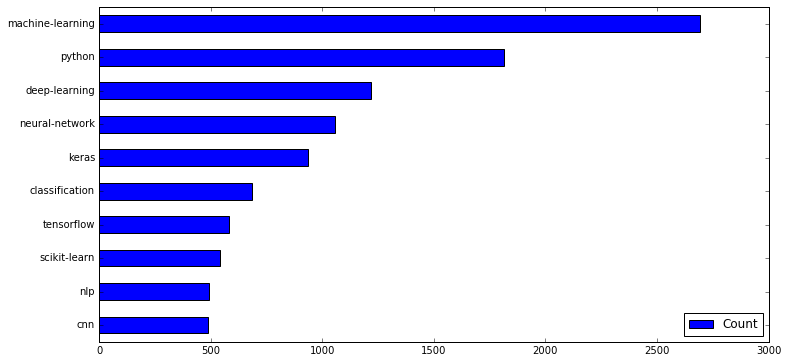

In [9]:
tag_count.head(10).sort_values('Count').plot.barh(figsize=(12,6))

### Most Popular Tags by Views

In [10]:
tag_view_count = {}        

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag not in tag_view_count:
            tag_view_count[tag] = row['ViewCount']
        else:
            tag_view_count[tag] += row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient='index')
tag_view_count.rename(columns={0: 'Views'}, inplace=True)
tag_view_count.sort_values('Views', ascending=False, inplace=True)
tag_view_count.head(10)

,Views
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


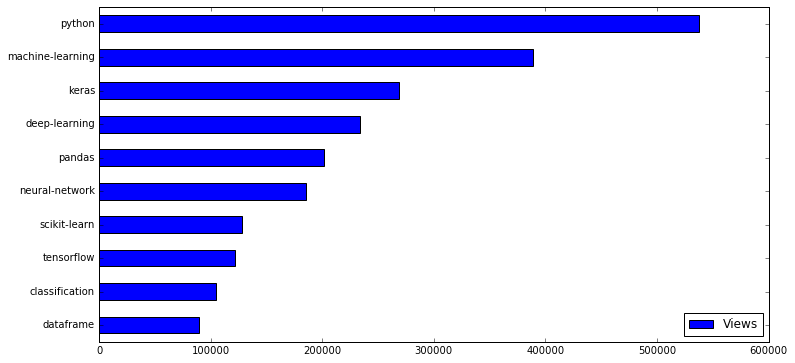

In [11]:
tag_view_count.head(10).sort_values('Views').plot.barh(figsize=(12,6))

## Relations between Tags

We would expect a strong correlation between the most-used and most-viewed tags. The more popular a tag is when asking a question, the more popular it is likely to be when viewing a question. A quick glance at the most-used and most-viewed tags shows that there are a few differences but that this logic seems to hold true. Let's take a closer look at the top ten tags for both categories.

Of the top ten most-used tags, only `nlp` and `cnn` are not in the top ten most-viewed tags.

In [12]:
pd.merge(tag_count.head(10), tag_view_count.head(10), how='left', left_index=True, right_index=True)

,Count,Views
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0
nlp,493,NaN
cnn,489,NaN


Of the top ten most-viewed tags, only `pandas` and `dataframe` are not in the top ten most-used tags. This is interesting as these two tags are very much related.

In [13]:
pd.merge(tag_view_count.head(10), tag_count.head(10), how='left', left_index=True, right_index=True)

,Views,Count
python,537585,1814.0
machine-learning,388499,2693.0
keras,268608,935.0
deep-learning,233628,1220.0
pandas,201787,NaN
neural-network,185367,1055.0
scikit-learn,128110,540.0
tensorflow,121369,584.0
classification,104457,685.0
dataframe,89352,NaN


As we saw, the only two tags in the top ten most-viewed but not in the top ten most-used, `pandas` and `dataframe`, are very much related. What if we wanted to see the relations between other tags? How would we go about about technical solutions to determining how tags are related? We could do something like the following although there are likely better solutions.

In [14]:
related_tags = {}        

for index, row in questions.iterrows():
    if 'machine-learning' in row['Tags']:
        for tag in row['Tags']:
            related_tags[tag] = related_tags.get(tag, 0) + 1
            
related_tags = pd.DataFrame.from_dict(related_tags, orient='index')
related_tags.rename(columns={0: 'Count'}, inplace=True)
related_tags.sort_values('Count', ascending=False, inplace=True)
related_tags = related_tags[1:]
related_tags.head(10)

,Count
python,499
deep-learning,429
neural-network,366
classification,259
keras,195
scikit-learn,188
machine-learning-model,139
time-series,131
cnn,124
predictive-modeling,123


## Enter Domain Knowledge

One issue with a technical solution to tag relationships is that they are not necessarily needed. A much simpler method would be to use our knowledge of the fields to see what relationships there may be.

Of the top ten tags from each category, there are eight tags in both lists:
* `machine-learning`
* `python`
* `deep-learning`
* `neural-network`
* `keras`
* `classification`
* `tensorflow`
* `scikit-learn`

Five of these tags, `machine-learning`, `deep-learning`, `neural-network`, `keras`, and `tensorflow` (along with `nlp` and `cnn` from the most-used list) are all connected with machine learning and in general, more specifically with [deep learning](https://en.wikipedia.org/wiki/Deep_learning). 

## Deep Learning: Just a Fad?

The point of this analysis is to determine what kind of data science content our company should create. Before making a recommendation, we need to now whether our findings are relevant. Is deep learning just a fad? Is interest in deep learning slowing, or is this a relevant topic for today? In order to answer this question, we will look at a list of all of the questions ever asked on DSSE. We can look at different time periods to look for any trends in deep machine learning questions. We will look for the frequency of the five popular tags listed above:

* `machine-learning`
* `deep-learning`
* `neural-network`
* `keras`
* `tensorflow`

In [15]:
# Read in file containing all questions ever asked on Stack Exchange's data science site.

all_q = pd.read_csv('all_questions.csv')
all_q.info()
all_q.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null object
Tags            21576 non-null object
dtypes: int64(1), object(2)
memory usage: 505.8+ KB


,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [16]:
#Clean the date and tags columns as we did with 2019_questions.csv

all_q['CreationDate'] = pd.to_datetime(all_q['CreationDate'])

all_q['Tags'] = all_q['Tags'].str.replace('<','')
all_q['Tags'] = all_q['Tags'].str.replace('>',',')
all_q['Tags'] = all_q['Tags'].apply(
    lambda string: string[:-1])
all_q['Tags'] = all_q['Tags'].apply(
    lambda string: string.split(','))

all_q.info()
all_q.head()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null datetime64[ns]
Tags            21576 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


In [17]:
deep_tags = ['machine-learning', 'deep-learning', 'neural-network', 'keras', 'tensorflow']

def deep_tag_find(tags):
    for tag in tags:
        if tag in deep_tags:
            return 1
        else:
            return 0

all_q['DeepLearning'] = all_q['Tags'].apply(deep_tag_find)
all_q.head()

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0


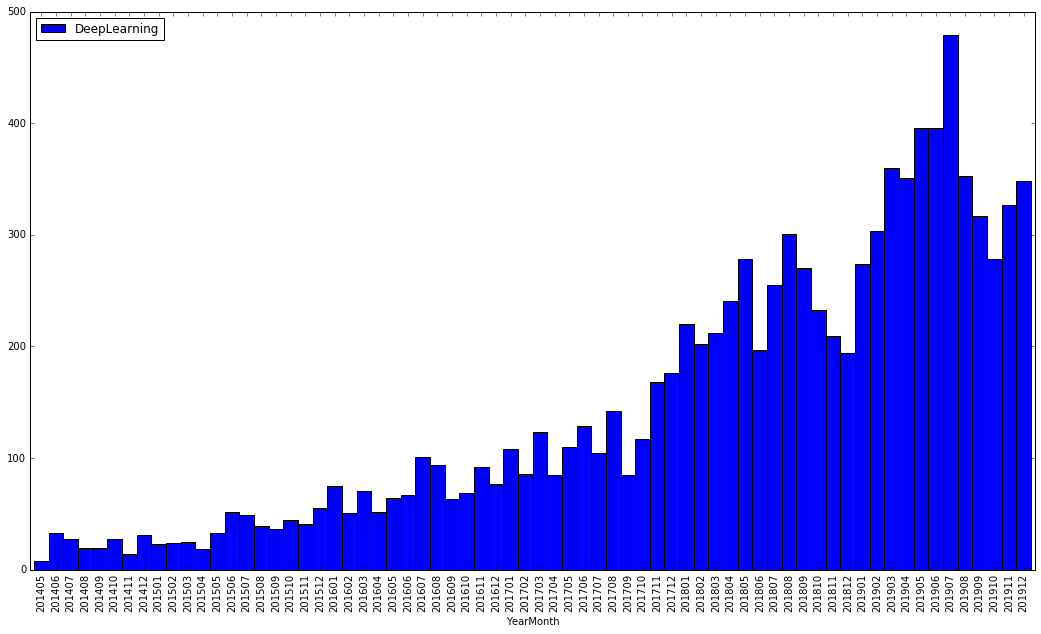

In [18]:
# Plot the usage of the five tags by month

year = all_q['CreationDate'].dt.year
month = all_q['CreationDate'].dt.month

all_q['YearMonth'] = (year * 100) + month
all_q = all_q[all_q['YearMonth'] != 202001].copy()
all_q_grouped = pd.DataFrame(all_q.groupby('YearMonth')['DeepLearning'].sum())
all_q_grouped.plot.bar(width=1, figsize=(18,10))

We can see that the number of deep learning questions has increased in popularity over the years. While much of this growth may be due to the growth of the website itself, that does not change the fact that deep learning is the most asked topic on the site today. The growth may have plateaued, but it does not look to be decreasing. We therefore recommend writing content that deals with deep learning as this content is likely to be very popular.